### **Impor library yang diperlukan**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

**1. The text column**: which contains the email data inclusive of the email header, subject and the likes
**2. The target column**: which is the classification term for the data as either **a spam (1)** or **not a spam (0)**

In [ ]:
dataset = "https://media.githubusercontent.com/media/Iswin25/Klasifikasi_Spam_Email/main/Datasets/spam_assassin.csv"

In [65]:
df = pd.read_csv(dataset)

In [ ]:
df.head()

,text,target
0,From ilug-admin@linux.ie Mon Jul 29 11:28:02 2...,0
1,From gort44@excite.com Mon Jun 24 17:54:21 200...,1
2,From fork-admin@xent.com Mon Jul 29 11:39:57 2...,1
3,From dcm123@btamail.net.cn Mon Jun 24 17:49:23...,1
4,From ilug-admin@linux.ie Mon Aug 19 11:02:47 2...,0


In [ ]:
df.shape

(5796, 2)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5796 entries, 0 to 5795
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5796 non-null   object
 1   target  5796 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 90.7+ KB


In [ ]:
df.describe()

,target
count,5796.000000
mean,0.327122
std,0.469203
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


**Visualisasi distribusi kelas dataset**

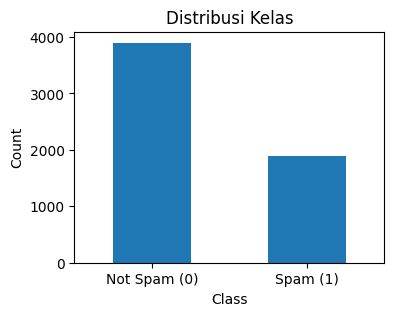

In [63]:
import matplotlib.pyplot as plt

plt.figure(figsize=(4, 3))  # atur ukuran diagram
df['target'].value_counts().plot(kind='bar')

plt.xticks([0, 1], ['Not Spam (0)', 'Spam (1)'], rotation=0)
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Distribusi Kelas")
plt.show()

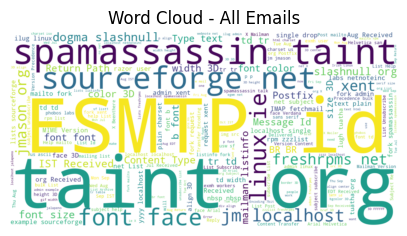

In [68]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Gabungkan semua teks
all_text = " ".join(df['text'].astype(str))

# Buat word cloud
wordcloud = WordCloud(width=1600, height=800, background_color='white').generate(all_text)

# Tampilkan
plt.figure(figsize=(5, 4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud - All Emails")
plt.show()

**Preprocessing Sederhana**

In [ ]:
import re

def clean_text(text):
    text = text.lower()                        # lowercase
    text = re.sub(r'<.*?>', ' ', text)         # remove HTML tags
    text = re.sub(r'http\S+|www\S+', ' url ', text)  # replace URL
    text = re.sub(r'\S+@\S+', ' email ', text) # replace email address
    text = re.sub(r'[^a-zA-Z]', ' ', text)     # keep letters only
    text = re.sub(r'\s+', ' ', text)           # remove extra spaces
    return text.strip()

df['text'] = df['text'].astype(str).apply(clean_text)
df.head()

,text,target
0,from email mon jul return path delivered to em...,0
1,from email mon jun return path email delivery ...,1
2,from email mon jul return path delivered to em...,1
3,from email mon jun return path email delivery ...,1
4,from email mon aug return path delivered to em...,0


**4. Split Data: Train & Test**

In [ ]:
X = df['text']
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

**5. TF-IDF Vectorization**

In [ ]:
vectorizer = TfidfVectorizer(
    max_features=5000,        # bisa disesuaikan
    ngram_range=(1,2),        # unigram + bigram (lebih kuat)
    stop_words='english'
)

X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

**6. Train Model Naive Bayes**

In [ ]:
model = MultinomialNB(alpha=0.1)
model.fit(X_train_tfidf, y_train)

MultinomialNB(alpha=0.1)

In [ ]:
y_pred = model.predict(X_test_tfidf)

print("Accuracy:", accuracy_score(y_test, y_pred))
print()
print(classification_report(y_test, y_pred))

Accuracy: 0.9896551724137931

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       779
           1       0.99      0.98      0.98       381

    accuracy                           0.99      1160
   macro avg       0.99      0.99      0.99      1160
weighted avg       0.99      0.99      0.99      1160



In [ ]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[776   3]
 [  9 372]]


**UJI MODEL DENGAN DATA RANDOM**

In [ ]:
def predict_email(text):
    cleaned = clean_text(text)
    vector = vectorizer.transform([cleaned])
    prediction = model.predict(vector)[0]
    prob = model.predict_proba(vector)[0]

    return {
        "prediction": "SPAM" if prediction == 1 else "HAM",
        "probabilities": {
            "ham": float(prob[0]),
            "spam": float(prob[1])
        }
    }

In [ ]:
predict_email("Congratulations! You won a FREE prize. Click here now!")

{'prediction': 'SPAM',
 'probabilities': {'ham': 0.03856361674818406, 'spam': 0.9614363832518164}}

**SIMPAN MODEL**

In [ ]:
import pickle

pickle.dump(model, open("spam_model.pkl", "wb"))
pickle.dump(vectorizer, open("tfidf.pkl", "wb"))
